In [85]:
import pandas as pd 
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go


In [86]:
latlong = pd.read_csv(r"C:\Users\sumit\OneDrive\Desktop\dsmp\plotly_dash\dataset\district wise centroids.csv")
census = pd.read_csv(r"C:\Users\sumit\OneDrive\Desktop\dsmp\plotly_dash\dataset\india-districts-census-2011.csv")

In [87]:
census = census.loc[:, ~census.columns.duplicated()]
census

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,16610,19860,144,...,2316,4309,1370,838,2208,576,978,1554,1446,10027
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,79903,75013,35348,...,1063,2408,665,340,1005,246,483,729,341,4890
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,15397,9935,0,...,685,1895,212,134,346,70,120,190,84,3151
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,43186,35497,0,...,685,1895,212,134,346,70,120,190,84,3151


In [98]:
col = ['District code',	'State name',	'District name',	'Population',	'Male',	'Female',	'Literate',	'Male_Literate',	'Female_Literate']

In [99]:
census = census[col]

In [100]:
df = latlong.merge(census , left_on='District', right_on='District name').drop(columns='District name')

In [101]:
df['sex_ratio'] = round(df['Female']/df['Male']*100)

In [106]:
df['literacy_rate']= round((df['Literate']/df['Population'])*100)

In [109]:
df.drop(columns=['Male','Female','Literate'],inplace=True)

In [110]:
df

,State,District,Latitude,Longitude,District code,State name,Population,Male_Literate,Female_Literate,sex_ratio,literacy_rate
0,Andhra Pradesh,Adilabad,19.284514,78.813212,532,ANDHRA PRADESH,2741239,856350,626997,100.0,54.0
1,Andhra Pradesh,Anantapur,14.312066,77.460158,553,ANDHRA PRADESH,4081148,1338474,972486,98.0,57.0
2,Andhra Pradesh,Chittoor,13.331093,78.927639,554,ANDHRA PRADESH,4174064,1484794,1183084,100.0,64.0
3,Andhra Pradesh,East Godavari,16.782718,82.243207,545,ANDHRA PRADESH,5154296,1716933,1571644,101.0,64.0
4,Andhra Pradesh,Guntur,15.884926,80.586576,548,ANDHRA PRADESH,4887813,1634726,1325715,100.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
512,West Bengal,Maldah,25.080268,88.171917,332,WEST BENGAL,3988845,1152019,934413,94.0,52.0
513,West Bengal,Murshidabad,24.259507,88.168169,333,WEST BENGAL,7103807,2177187,1878647,96.0,57.0
514,West Bengal,Nadia,23.564110,88.582930,336,WEST BENGAL,5167600,1878866,1601689,95.0,67.0
515,West Bengal,Puruliya,23.254192,86.396853,340,WEST BENGAL,2930115,1002058,622847,96.0,55.0


In [111]:
df.to_csv('India-dataset.csv')

In [118]:
list_of_state = list(df['State'].unique())

In [120]:
list_of_state.insert(0,'Overall Analysis')

In [121]:
list_of_state

['Overall Analysis',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Daman and Diu',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Orissa',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttaranchal',
 'West Bengal']

In [130]:
sorted(list(df.columns[5:]))

['Female_Literate',
 'Male_Literate',
 'Population',
 'State name',
 'literacy_rate',
 'sex_ratio']

In [132]:
latlong

,State,District,Latitude,Longitude
0,Andaman and Nicobar,Andaman Islands,12.382571,92.822911
1,Andaman and Nicobar,Nicobar Islands,7.835291,93.511601
2,Andhra Pradesh,Adilabad,19.284514,78.813212
3,Andhra Pradesh,Anantapur,14.312066,77.460158
4,Andhra Pradesh,Chittoor,13.331093,78.927639
...,...,...,...,...
589,West Bengal,North 24 Parganas,22.062388,88.877940
590,West Bengal,Puruliya,23.254192,86.396853
591,West Bengal,South 24 Parganas,21.854428,88.445370
592,West Bengal,Uttar Dinajpur,26.044619,88.235952


C:\Users\sumit\AppData\Local\Temp\ipykernel_2336\4075425448.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



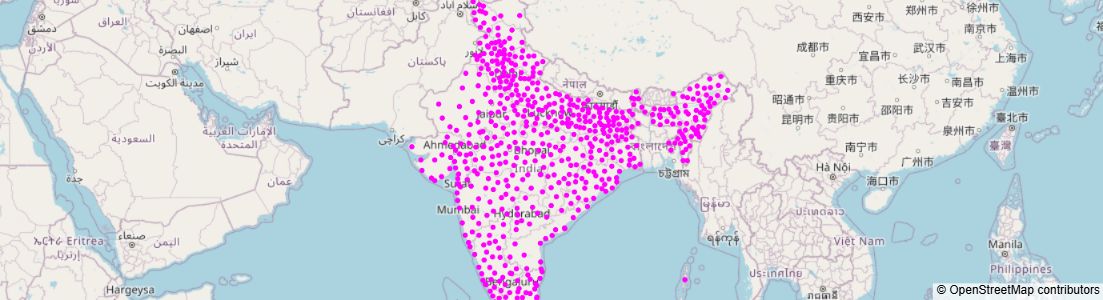

In [142]:
import pandas as pd

import plotly.express as px

fig = px.scatter_mapbox(latlong, lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()